In [48]:
import os
import zipfile
import json
from collections import Counter

word_frequency = Counter()

folder_path = "News_Datasets"
for file_name in os.listdir(folder_path):
    if file_name.endswith(".zip"):
        zip_path = os.path.join(folder_path, file_name)
        
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            for inner_file in zip_ref.namelist():
                if inner_file.endswith(".json"):
                    with zip_ref.open(inner_file) as f:
                        data = json.load(f)  
                        if isinstance(data, dict) and "text" in data and "language" in data and data["language"].lower() == "english":
                            text = data["text"]
                        else:
                            text = json.dumps(data)
                        words = text.split()
                        word_frequency.update(words)
word_frequency_of_frequency = Counter(word_frequency.values())

c:\python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\python310\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Administrator\.cache\huggingface\hub\datasets--wikimedia--wikipedia. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://

DatasetDict({
    train: Dataset({
        features: ['id', 'url', 'title', 'text'],
        num_rows: 6407814
    })
})


In [49]:
for i, row in enumerate(ds["train"]):
    text = row["text"]
    words = text.split()
    word_frequency.update(words)
word_frequency_of_frequency = Counter(word_frequency.values())

MemoryError: 

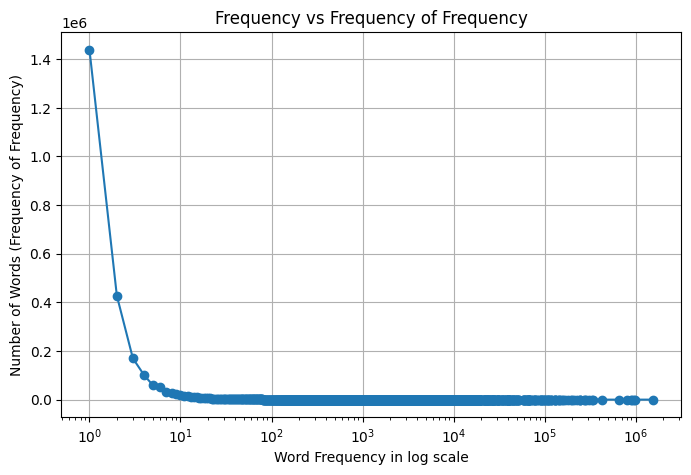

In [45]:
import matplotlib.pyplot as plt
x = sorted(word_frequency_of_frequency.keys())
y = [word_frequency_of_frequency[k] for k in x]

plt.figure(figsize=(8,5))
plt.plot(x, y, marker="o")
plt.xscale("log")
plt.xlabel("Word Frequency in log scale")
plt.ylabel("Number of Words (Frequency of Frequency)")
plt.title("Frequency vs Frequency of Frequency")
plt.grid(True)
plt.show()

In [33]:
import nltk
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("omw-1.4")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()


def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    words = [
        lemmatizer.lemmatize(w)
        for w in tokens
        if w.isalnum() and w not in stop_words
    ]
    return words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Administrator/nltk_data...


In [34]:
import os
import zipfile
import json
from collections import Counter

word_frequency = Counter()

folder_path = "News_Datasets" 

for file_name in os.listdir(folder_path):
    if file_name.endswith(".zip"):
        zip_path = os.path.join(folder_path, file_name)
        
        with zipfile.ZipFile(zip_path, "r") as zip_ref:
            for inner_file in zip_ref.namelist():
                if inner_file.endswith(".json"):
                    with zip_ref.open(inner_file) as f:
                        data = json.load(f)
                        if isinstance(data, dict) and "text" in data:
                            text = data["text"]
                        else:
                            text = json.dumps(data)

                        words = preprocess_text(text)

                        if words:
                            word_frequency.update(words)
word_frequency_of_frequency = Counter(word_frequency.values())


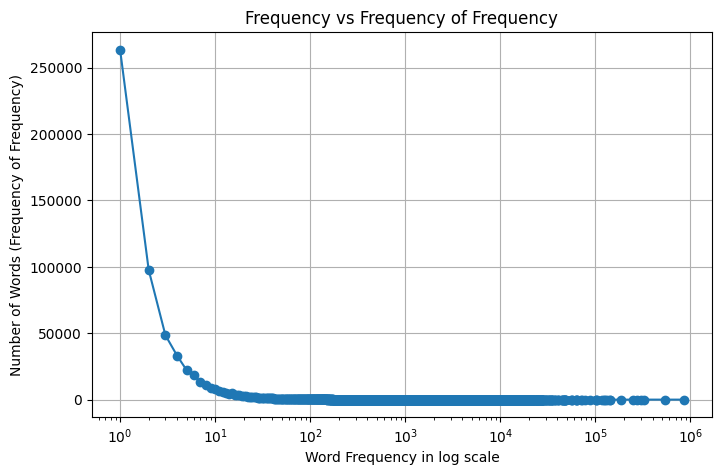

In [38]:
import matplotlib.pyplot as plt
x = sorted(word_frequency_of_frequency.keys())
y = [word_frequency_of_frequency[k] for k in x]

plt.figure(figsize=(8,5))
plt.plot(x, y, marker="o")
plt.xscale("log")
plt.xlabel("Word Frequency in log scale")
plt.ylabel("Number of Words (Frequency of Frequency)")
plt.title("Frequency vs Frequency of Frequency")
plt.grid(True)
plt.show()

In [1]:
import time
import string
import json
import warnings
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# NLTK for text preprocessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Hugging Face datasets library to load Wiki data
from datasets import load_dataset

# Elasticsearch client and bulk helper
from elasticsearch import Elasticsearch
from elasticsearch.helpers import bulk
from elasticsearch.exceptions import ConnectionError
from urllib3.exceptions import InsecureRequestWarning

c:\Users\Administrator\OneDrive\Desktop\IRE_assignment1\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ELASTIC_PASSWORD = "2vr60ZUn2trLukZg_EPp"  # Paste the password you reset
# This was in your logs: 6dce...
ELASTIC_FINGERPRINT = "PASTE_YOUR_HTTP_CA_FINGERPRINT_HERE" 

# This is a placeholder. Update with the real path to your news data.
# Assuming it's a JSONL file (json-lines) as is common.
NEWS_FOLDER_PATH = "./News_Datasets" 
# ⚠️ ADD THE PATH TO YOUR WIKI FOLDER
WIKI_FOLDER_PATH = "./free-news-datasets/wikis_dataset"

# Assignment requirements
INDEX_NAME = "esindex-v1.0"

# Data loading limits (for reasonable script runtime)
WIKI_DOCS_TO_LOAD = 5000
NEWS_DOCS_TO_LOAD = 5000

In [22]:
def connect_to_es():
    """
    Connects to the local Elasticsearch instance using credentials
    and SSL fingerprint for a secure connection.
    """
    print("Connecting to Elasticsearch...")
    try:
        # --- MODIFICATION ---
        # Suppress the warning you get for not verifying the SSL certificate
        # This is the correct warning class, which comes from urllib3
        os.environ['NO_PROXY'] = 'localhost,127.0.0.1'
        warnings.filterwarnings("ignore", category=InsecureRequestWarning)

        client = Elasticsearch(
            "https://localhost:9200",
            basic_auth=("elastic", ELASTIC_PASSWORD),
            # This is the "easier" but insecure way for local dev.
            # It's the equivalent of 'curl --insecure'
            verify_certs=False
        )
        # --- END MODIFICATION ---

        # Test the connection
        if client.ping():
            print("✅ Successfully connected to Elasticsearch!")
            return client
        else:
            print("❌ Could not connect to Elasticsearch.")
            return None
    except ConnectionError as e:
        print(f"Connection failed: {e}")
        print("\n--- TROUBLESHOOTING ---")
        print("1. Is your Docker container 'es1' running? (Check with `docker ps`)")
        print("2. Did you paste the correct ELASTIC_PASSWORD?")
        # print("3. Did you paste the correct ELASTIC_FINGERPRINT?") # No longer needed
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

In [4]:
def setup_nltk():
    """Downloads necessary NLTK models."""
    print("Downloading NLTK resources (stopwords, punkt)...")
    nltk.download('stopwords')
    nltk.download('punkt')

def preprocess_text(text):
    """
    Applies all preprocessing steps to a single string of text:
    1. Lowercasing
    2. Tokenization
    3. Punctuation removal
    4. Stopword removal
    5. Stemming
    """
    if not isinstance(text, str):
        return ""
        
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    
    # 1. Lowercase
    text = text.lower()
    
    # 2. Tokenize
    tokens = word_tokenize(text)
    
    processed_words = []
    for token in tokens:
        # 3. Remove punctuation and non-alphabetic tokens
        if token.isalpha():
            # 4. Remove stopwords
            if token not in stop_words:
                # 5. Stem
                processed_words.append(stemmer.stem(token))
                
    # Join back into a single string for indexing
    return " ".join(processed_words)

In [5]:
def load_data_sources():
    """Loads and samples data from the News and Wiki sources."""
    documents = []
    news_docs_loaded_count = 0
    
    # Load News Data
    print(f"Loading news data from folder '{NEWS_FOLDER_PATH}'...")
    try:
        # Loop through all files in the given folder
        for zip_filename in os.listdir(NEWS_FOLDER_PATH):
            if not zip_filename.endswith(".zip"):
                continue
                
            if news_docs_loaded_count >= NEWS_DOCS_TO_LOAD:
                print(f"Reached news document limit of {NEWS_DOCS_TO_LOAD}.")
                break
                
            zip_filepath = os.path.join(NEWS_FOLDER_PATH, zip_filename)
            # print(f"  Opening zip file: {zip_filename}") # Making this less verbose
            
            with zipfile.ZipFile(zip_filepath, 'r') as zf:
                # Loop through each file inside the zip
                for json_filename in zf.namelist():
                    if not json_filename.endswith(".json"):
                        continue
                        
                    if news_docs_loaded_count >= NEWS_DOCS_TO_LOAD:
                        break
                        
                    try:
                        # Open and read the JSON file from within the zip
                        with zf.open(json_filename) as f:
                            data = json.load(f)
                            
                            # Extract relevant fields (you MUST change these keys)
                            # Inspect your JSON to find the correct keys for title/text
                            title = data.get('title', '') 
                            text = data.get('text', '') # or data.get('content')
                            
                            if text: # Only add documents with content
                                documents.append({
                                    "source": "news_webz.io",
                                    "title": str(title),
                                    "text": str(text)
                                })
                                news_docs_loaded_count += 1
                                
                    except Exception as e:
                        print(f"    Error reading {json_filename} in {zip_filename}: {e}")
        
        print(f"Loaded {news_docs_loaded_count} news documents.")

    except FileNotFoundError:
        print(f"⚠️ WARNING: News folder not found at '{NEWS_FOLDER_PATH}'. Skipping.")
    except Exception as e:
        print(f"⚠️ WARNING: Could not load news data. Error: {e}. Skipping.")

    
    # Load Wiki Data
    print(f"Loading wiki data from folder '{WIKI_FOLDER_PATH}'...")
    wiki_docs_loaded_count = 0
    try:
        # --- NEW LOGIC FOR .ARROW FILES ---
        
        # 1. Find all .arrow files in the specified folder
        arrow_files = [os.path.join(WIKI_FOLDER_PATH, f) for f in os.listdir(WIKI_FOLDER_PATH) if f.endswith('.arrow')]

        if not arrow_files:
            print(f"⚠️ WARNING: No .arrow files found in '{WIKI_FOLDER_PATH}'. Skipping.")
        else:
            print(f"Found {len(arrow_files)} .arrow files. Loading...")
            
            # 2. Use load_dataset to read the arrow files
            # This loads them all into a single, lazy-loadable dataset object
            wiki_dataset = load_dataset('arrow', data_files=arrow_files, split='train')
            
            print(f"Successfully loaded wiki dataset. Total rows: {len(wiki_dataset)}")

            # 3. Iterate through the dataset and append documents
            for doc in wiki_dataset:
                if wiki_docs_loaded_count >= WIKI_DOCS_TO_LOAD:
                    print(f"Reached wiki document limit of {WIKI_DOCS_TO_LOAD}.")
                    break
                
                # Extract relevant fields (you MUST change these keys)
                # Inspect your data to find the correct keys for title/text
                # These are now COLUMN NAMES in your Arrow file.
                title = doc.get('title', '') 
                text = doc.get('text', '') # or doc.get('content')
                
                if text: # Only add documents with content
                    documents.append({
                        "source": "wikipedia",
                        "title": str(title),
                        "text": str(text)
                    })
                    wiki_docs_loaded_count += 1

        print(f"Loaded {wiki_docs_loaded_count} wiki documents.")
        # --- END NEW LOGIC ---

    except FileNotFoundError:
        print(f"⚠️ WARNING: Wiki folder not found at '{WIKI_FOLDER_PATH}'. Skipping.")
    except Exception as e:
        print(f"⚠️ WARNING: Could not load wiki data. Error: {e}.")
        print("   >>> HINT: Did you run 'pip install datasets pyarrow'?")
        
    print(f"Total documents loaded: {len(documents)}")
    return documents

In [6]:
def generate_frequency_plots(documents):
    """
    Generates and saves word frequency plots with and without preprocessing.
    """
    print("Generating word frequency plots...")
    
    # 1. Combine a sample of text for analysis
    # Use a smaller sample for plotting to avoid long processing times
    plot_sample_size = min(len(documents), 500)
    print(f"Using a sample of {plot_sample_size} documents for plots.")
    
    # Get text before preprocessing
    raw_text_sample = " ".join([doc['text'] for doc in documents[:plot_sample_size]])
    
    # Get text after preprocessing
    processed_text_sample = " ".join([preprocess_text(doc['text']) for doc in documents[:plot_sample_size]])
    
    # 2. Calculate Frequencies
    raw_tokens = [
        token for token in word_tokenize(raw_text_sample.lower()) 
        if token.isalpha() and token not in stopwords.words('english')
    ]
    raw_freq = Counter(raw_tokens)
    
    processed_tokens = word_tokenize(processed_text_sample) # Already preprocessed
    processed_freq = Counter(processed_tokens)
    
    # 3. Create and save plots
    try:
        # Plot 1: Raw Text
        plt.figure(figsize=(15, 7))
        plt.bar(*zip(*raw_freq.most_common(30)))
        plt.title('Top 30 Word Frequencies (Before Preprocessing)')
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.xticks(rotation=60)
        plt.tight_layout()
        plt.savefig('word_freq_raw.png')
        print("Saved 'word_freq_raw.png'")
        
        # Plot 2: Processed Text
        plt.figure(figsize=(15, 7))
        plt.bar(*zip(*processed_freq.most_common(30)))
        plt.title('Top 30 Word Frequencies (After Preprocessing)')
        plt.xlabel('Stems')
        plt.ylabel('Frequency')
        plt.xticks(rotation=60)
        plt.tight_layout()
        plt.savefig('word_freq_processed.png')
        print("Saved 'word_freq_processed.png'")
        
    except Exception as e:
        print(f"⚠️ Could not create plots: {e}")
        print("   (This can happen if the sample was too small or empty)")


In [7]:
def create_index(client):
    """
    Creates the 'ESIndex-v1.0' index with a specific mapping.
    Deletes the old one if it exists.
    """
    print(f"Setting up index '{INDEX_NAME}'...")
    
    try:
        # Delete the index if it already exists for a fresh start
        if client.indices.exists(index=INDEX_NAME):
            print("Index already exists. Deleting...")
            client.indices.delete(index=INDEX_NAME)
            
        # Define the index mapping
        mapping = {
            "properties": {
                "source": {"type": "keyword"},  # Not analyzed (for exact matching)
                "title": {"type": "text"},     # Analyzed (for full-text search)
                "content": {"type": "text"}    # Analyzed (for full-text search)
            }
        }
        
        client.indices.create(index=INDEX_NAME, mappings=mapping)
        print("✅ Index created with mapping.")
    except Exception as e:
        print(f"An error occurred during index creation: {e}")

In [14]:
def bulk_index_data(client, documents):
    """
    Indexes all documents into Elasticsearch using the efficient
    bulk helper and a generator.
    """
    print(f"Starting bulk indexing of {len(documents)} documents...")
    
    def yield_actions(docs):
        for i, doc in enumerate(docs):
            yield {
                "_index": INDEX_NAME,
                "_id": f" {doc['source']}_{i}",
                "_source": {
                    "source": doc['source'],
                    "title": doc['title'],
                    # Apply preprocessing to the content field before indexing
                    "content": preprocess_text(doc['text'])
                }
            }

    start_time = time.perf_counter()
    try:
        # Use the bulk helper
        success, failed = bulk(client, yield_actions(documents), chunk_size=1000)
        end_time = time.perf_counter()
        
        print(f"✅ Bulk indexing complete in {end_time - start_time:.2f} seconds.")
        print(f"Successfully indexed: {success}")
        print(f"Failed to index: {failed}")
        
        # Force a refresh so data is immediately searchable for benchmarks
        client.indices.refresh(index=INDEX_NAME)
        print("Index refreshed.")
        
    except Exception as e:
        print(f"An error occurred during bulk indexing: {e}")


In [16]:
def run_benchmarks(client):
    """
    Runs a diverse set of queries to measure latency and throughput.
    """
    print("\n--- Running Benchmarks (Artefacts A & B) ---")
    
    # Per assignment: "Create a set that is diverse enough"
    # This query set is justified below.
    query_set = {
        # 1. Simple term: High-frequency, common search
        "simple_term": {"query": {"match": {"content": "world"}}},
        
        # 2. Multi-term: Tests coordination of multiple terms
        "multi_term": {"query": {"match": {"content": "financial markets"}}},
        
        # 3. Phrase search: Tests for exact phrase matching
        "phrase_search": {"query": {"match_phrase": {"content": "artificial intelligence"}}},
        
        # 4. Boolean query: Tests complex logic
        "boolean_query": {"query": {"query_string": {"query": "(stock AND price) OR (crypto AND bitcoin)"}}},
        
        # 5. Non-existent term: Tests "miss" performance
        "no_results": {"query": {"match": {"content": "asdfghjkl"}}}
    }
    
    # Justification for diversity:
    # This set captures:
    # - Simple term lookups (the fastest)
    # - Multi-term lookups (standard use case)
    # - Positional lookups (phrase, more expensive)
    # - Complex boolean logic (most expensive)
    # - Cache performance for hits vs. misses (no_results)
    
    latencies = []
    num_runs_per_query = 20 # Run each query 20 times for stable stats
    
    print(f"Running {len(query_set)} queries, {num_runs_per_query} times each...")
    
    total_start_time = time.perf_counter()
    
    for name, query_body in query_set.items():
        print(f"  Benchmarking query: '{name}'")
        
        # --- MODIFICATION ---
        # Create a new search body by copying the query and adding 'size'
        # This fixes the DeprecationWarning
        full_search_body = query_body.copy()
        full_search_body['size'] = 10
        # --- END MODIFICATION ---

        for _ in range(num_runs_per_query):
            query_start_time = time.perf_counter()
            
            client.search(
                index=INDEX_NAME,
                body=full_search_body
            )
            
            query_end_time = time.perf_counter()
            latencies.append((query_end_time - query_start_time) * 1000) # Store in ms
            
    total_end_time = time.perf_counter()
    total_time_taken = total_end_time - total_start_time
    total_queries_run = len(query_set) * num_runs_per_query

    # --- Calculate and Print Metrics ---
    
    # Artefact B: System Throughput
    throughput = total_queries_run / total_time_taken
    print("\n--- Artefact B: System Throughput ---")
    print(f"Total Queries Run: {total_queries_run}")
    print(f"Total Time Taken:  {total_time_taken:.2f} seconds")
    print(f"Throughput (Read): {throughput:.2f} queries/second")

    # Artefact A: System Response Time (Latency)
    p95 = np.percentile(latencies, 95)
    p99 = np.percentile(latencies, 99)
    print("\n--- Artefact A: System Response Time (Latency) ---")
    print(f"Average: {np.mean(latencies):.2f} ms")
    print(f"p95:     {p95:.2f} ms")
    print(f"p99:     {p99:.2f} ms")


In [10]:
def print_guidance_for_other_metrics():
    """Prints instructions for gathering metrics C and D."""
    
    print("\n--- Guidance for Artefacts C & D ---")
    
    print("\n--- Artefact C: Memory Footprint ---")
    print("This metric must be measured from *outside* Python.")
    print("1. Open a new terminal window.")
    print("2. Run the following command WHILE this script is indexing or benchmarking:")
    print("\n  docker stats es1\n")
    print("3. Watch the 'MEM USAGE' column. That is your memory footprint.")
    print("   (e.g., '1.85GiB / 3.84GiB')")
    
    print("\n--- Artefact D: Functional Metrics (Precision/Recall) ---")
    print("This is the most complex metric and requires a 'ground truth' dataset.")
    print("You cannot automate this part without first manually creating one.")
    print("Steps you will need to take:")
    print("1. Create a set of 10-20 'test queries' (e.g., 'What is the capital of France?').")
    print("2. For each query, manually search your data and create a list of")
    print("   document IDs that you consider 'relevant' (this is your 'ground truth').")
    print("3. Run your test queries using `client.search()`.")
    print("4. Get the list of doc IDs returned by Elasticsearch.")
    print("5. Compare the 'retrieved' IDs to your 'ground truth' IDs to calculate:")
    print("   - Precision = (relevant docs retrieved) / (total docs retrieved)")
    print("   - Recall    = (relevant docs retrieved) / (total relevant docs in ground truth)")



In [11]:
def main():
    client = connect_to_es()
    if not client:
        return

    # Download NLTK data
    setup_nltk()
    
    # Load data
    documents = load_data_sources()
    if not documents:
        print("No documents loaded. Exiting.")
        return
        
    # Run analysis for plots
    generate_frequency_plots(documents)
    
    # Create index
    create_index(client)
    
    # Index data
    bulk_index_data(client, documents)
    
    # Run benchmarks
    run_benchmarks(client)
    
    # Print guidance for remaining metrics
    print_guidance_for_other_metrics()

Connecting to Elasticsearch...


c:\Users\Administrator\OneDrive\Desktop\IRE_assignment1\env\lib\site-packages\elasticsearch\_sync\client\__init__.py:403: SecurityWarning: Connecting to 'https://localhost:9200' using TLS with verify_certs=False is insecure
  _transport = transport_class(


✅ Successfully connected to Elasticsearch!
Loading news data from folder './News_Datasets'...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Reached news document limit of 5000.
Loaded 5000 news documents.
Loading wiki data from folder './free-news-datasets/wikis_dataset'...
Found 41 .arrow files. Loading...
Successfully loaded wiki dataset. Total rows: 6407814
Reached wiki document limit of 5000.
Loaded 5000 wiki documents.
Total documents loaded: 10000
Generating word frequency plots...
Using a sample of 500 documents for plots.
Saved 'word_freq_raw.png'
Saved 'word_freq_processed.png'
Setting up index 'esindex-v1.0'...
Index already exists. Deleting...
✅ Index created with mapping.
Starting bulk indexing of 10000 documents...
✅ Bulk indexing complete in 284.79 seconds.
Successfully indexed: 10000
Failed to index: []
Index refreshed.

--- Running Benchmarks (Artefacts A & B) ---
Running 5 queries, 20 times each...
  Benchmarking query: 'simple_term'


ConnectionTimeout: Connection timed out

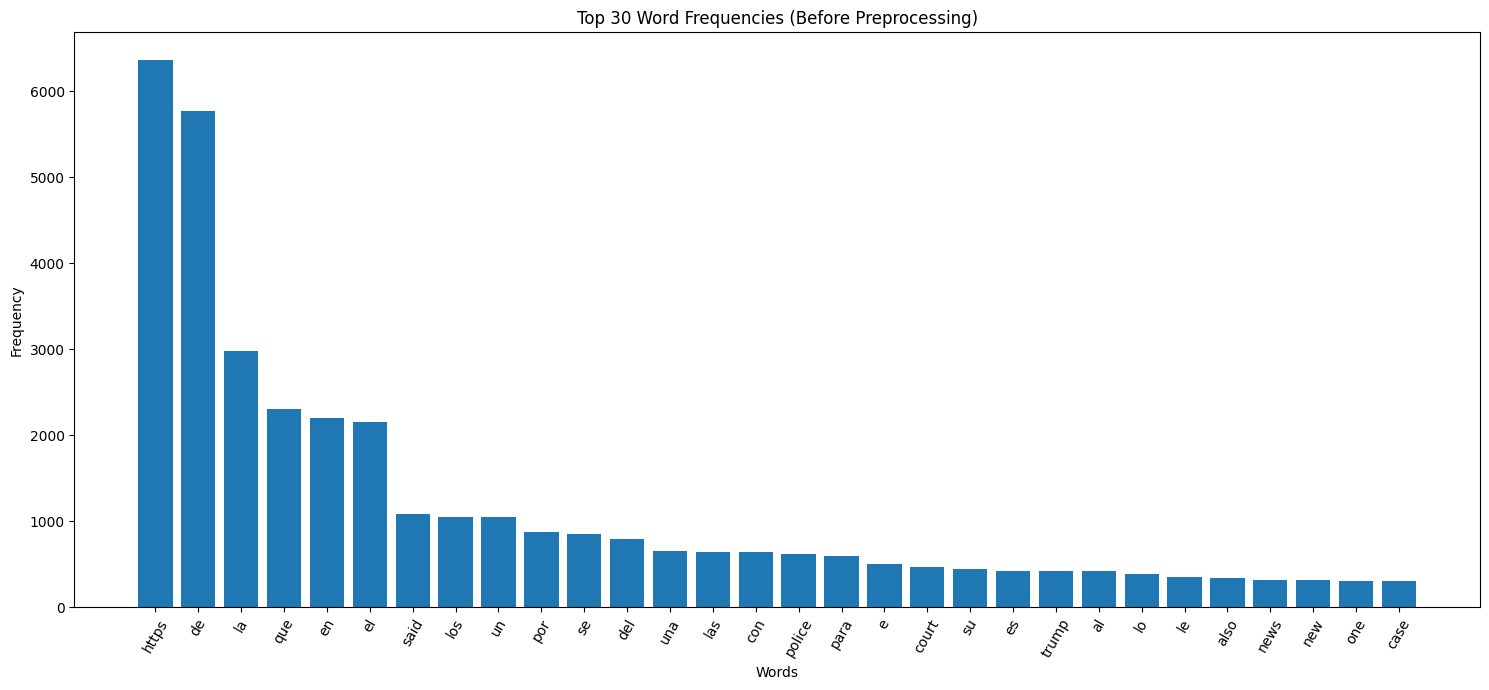

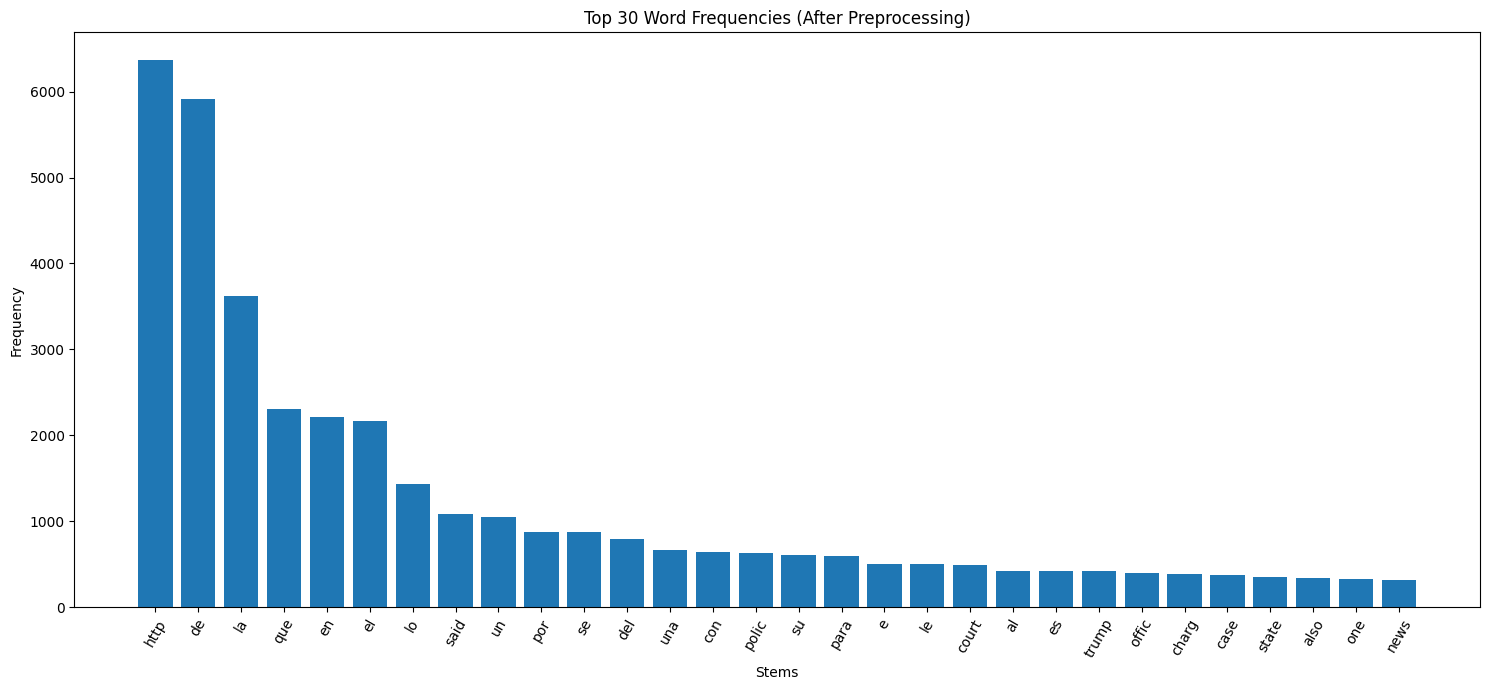

In [23]:
if __name__ == "__main__":
    main()